#Workshop 01
###Juan Camilo Vargas Velez - 2216273

In [2]:
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
import json

Here we installed the libraries that we will use, Psycopg2 is the library to establish the connection with Pgadmin4 the app for Postgres.
Mathplotlib is the library to make the graphical analisys. Then we do the connection to Postgres, by givin' it the name of the database, the username, password, host and port, these two are by default

In [3]:
def connect_postgres():
    with open('C:/Users/camil/OneDrive/Documents/GitHub/Workshop/db_config.json') as f:
        dbfile = json.load(f)
         
    connection = psycopg2.connect(
        database=dbfile["database"],
        user=dbfile["user"],
        password=dbfile["password"],
        host="localhost",
        port=5432
    )
    return connection
    print("Database connection ok")

Here we created the SQL table, taking into account the names of each column and their type (making sure that 'application_date' is on the right format).

In [4]:
def create_table():
    connection = connect_postgres()
    cursor = connection.cursor()

    cursor.execute("""CREATE TABLE candidates (
        first_name varchar(255),
        last_name varchar(255),
        email varchar(255),
        application_date DATE DEFAULT CURRENT_DATE,
        country varchar(255),
        yoe integer,
        seniority varchar(255),
        technology varchar(255),
        code_challenge_score integer, 
        technical_interview_score integer
    )""")

    connection.commit()
    cursor.close()
    connection.close()

With all this we can start by importing the csv file into our database.

In [ ]:
def insert_to_table():
    connection = connect_postgres()
    cursor = connection.cursor()
    with open("C:/Users/camil/OneDrive/Escritorio/ETL/candidates.csv", "r") as f: 
        next(f)
        cursor.copy_from(f, "candidates", sep=";")
    connection.commit()
    cursor.close()
    connection.close()

###First Query - Pie chart - technologies/deparments of the dataset.

[('Development - CMS Backend', 284), ('Data Engineer', 255), ('Salesforce', 256), ('Sales', 239), ('QA Automation', 243), ('DevOps', 495), ('QA Manual', 259), ('System Administration', 293), ('Development - FullStack', 254), ('Database Administration', 282), ('Business Intelligence', 254), ('Development - CMS Frontend', 251), ('Game Development', 519), ('Security Compliance', 250), ('Client Success', 271), ('Development - Backend', 255), ('Development - Frontend', 266), ('Security', 266), ('Social Media Community Management', 237), ('Mulesoft', 260), ('Technical Writing', 223), ('Design', 249), ('Adobe Experience Manager', 282), ('Business Analytics / Project Management', 255)]


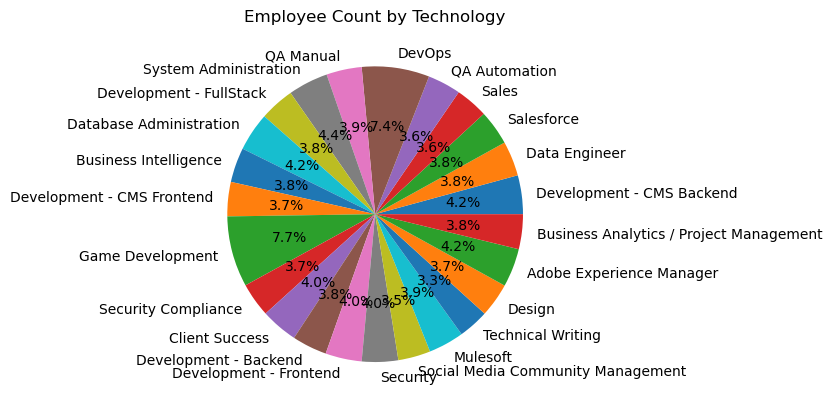

In [17]:
def Query1():
    connection = connect_postgres()
    cursor = connection.cursor()
    cursor.execute("SELECT technology, COUNT(*) AS resultado_tech FROM candidates WHERE code_challenge_score >= 7 AND technical_interview_score >=7 GROUP BY technology")
    results = cursor.fetchall()
    print(results)
    
    tecnologies = []
    for row in results:
        tecnologies.append(row)

    technology = [tupla[0] for tupla in tecnologies]
    employees = [tupla[1] for tupla in tecnologies]

    plt.pie(employees, labels=technology, autopct="%.1f%%")
    plt.title("Employee Count by Technology")
    plt.show()
Query1()

###Second Query - Horizontal Bar plot - employees count by year

[(Decimal('2021'), 1485), (Decimal('2020'), 1485), (Decimal('2022'), 795), (Decimal('2018'), 1409), (Decimal('2019'), 1524)]


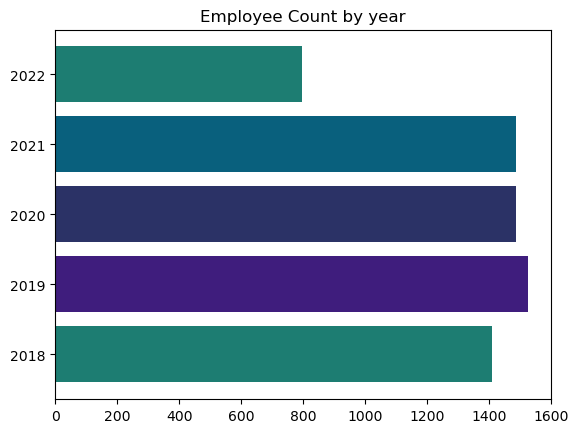

In [6]:
def Query2():
    connection = connect_postgres()
    cursor = connection.cursor()
    cursor.execute("SELECT EXTRACT(year FROM application_date) AS year, COUNT(application_date) AS conteo FROM candidates WHERE code_challenge_score >= 7 AND technical_interview_score >=7 GROUP BY year")
    results = cursor.fetchall()
    print(results)
    year = []
    for row in results:
        year.append(row)


    years = [tupla[0] for tupla in year]
    employees = [tupla[1] for tupla in year]
    colors = ["#09607d", "#2b3266", "#1d7d72","#1d7d72","#3f1d7d"]
    plt.barh(years,employees, color = colors)
    plt.title("Employee Count by year")
    plt.show()
Query2()

###Third Query - Bar plot - Employees count by Seniority

[('Architect', 971), ('Intern', 985), ('Trainee', 973), ('Senior', 939), ('Lead', 929), ('Mid-Level', 924), ('Junior', 977)]


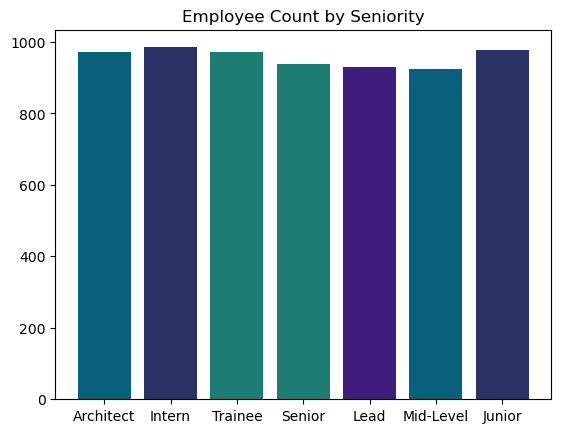

In [7]:
def Query3():
    connection = connect_postgres()
    cursor = connection.cursor()
    cursor.execute("SELECT seniority, COUNT(seniority) AS resultado_seniority FROM candidates WHERE code_challenge_score >= 7 AND technical_interview_score >=7 GROUP BY seniority")
    results = cursor.fetchall()
    print(results)
    seniorits = []
    for row in results:
        seniorits.append(row)

    seniorit = [tupla[0] for tupla in seniorits]
    employees = [tupla[1] for tupla in seniorits]
    colors = ["#09607d", "#2b3266", "#1d7d72","#1d7d72","#3f1d7d"]
    plt.bar(seniorit,employees, color=colors)
    plt.title("Employee Count by Seniority")
    plt.show()
Query3()

                     country  employes  year
0                     Brazil         9  2018
1                   Colombia         7  2018
2                    Ecuador         1  2018
3   United States of America         5  2018
4                     Brazil         7  2019
5                   Colombia         8  2019
6                    Ecuador         3  2019
7   United States of America         3  2019
8                     Brazil         6  2020
9                   Colombia         8  2020
10                   Ecuador         8  2020
11  United States of America         4  2020
12                    Brazil         7  2021
13                  Colombia         1  2021
14                   Ecuador         5  2021
15  United States of America         8  2021
16                    Brazil         4  2022
17                  Colombia         1  2022
18                   Ecuador         3  2022
19  United States of America         5  2022


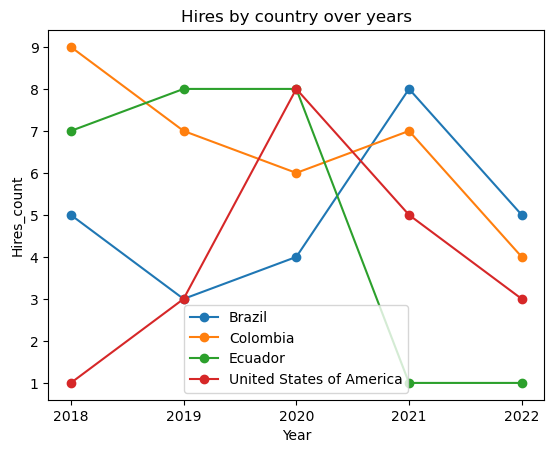

In [16]:
def Query4():
    allcountries = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']
    colors = ["#09607d", "#2b3266", "#1d7d72","#1d7d72","#3f1d7d"]
    connection = connect_postgres()
    cursor = connection.cursor()
    cursor.execute("""
        SELECT country, COUNT(country) as co, CAST(EXTRACT(year FROM application_date)AS INT) AS year
        FROM candidates
        WHERE country IN ('United States of America', 'Brazil', 'Colombia', 'Ecuador')
        AND code_challenge_score >= 7
        AND technical_interview_score >=7
        GROUP BY country, year
        ORDER BY year
    """)
    results = cursor.fetchall()
    countries =[]
    for row in results:
        countries.append(row)
    df = pd.DataFrame(countries)
    df.columns = ['country','employes','year']
    print(df)
    
    for country in allcountries:
        dfresult= df[df['country'] == country]
        plt.plot(dfresult['year'], dfresult['employes'], marker='o', label=country)
        
    plt.xlabel('Year')
    plt.ylabel('Hires_count')
    plt.title('Hires by country over years')
    plt.legend(df['country'].unique())
    plt.xticks(df['year'].unique())


    plt.show()
Query4()